In [239]:
from pathlib import Path
from collections import Counter
import os
data_dir = Path("0\\0\\")

# Get list of all the images
images = sorted(list(map(str, list(data_dir.glob("*.png")))))
labels1 = [img.split(os.path.sep)[-1].split(".jpg")[0] for img in images]
characters = set(char for label in labels for char in label)
characters = sorted(list(characters))

In [240]:
l=[0 for i in images]

In [241]:
result=[list(a) for a in zip(images,l)]

In [242]:
# Get list of all the images
data_dir = Path("1\\1\\")
images = sorted(list(map(str, list(data_dir.glob("*.png")))))
labels2 = [img.split(os.path.sep)[-1].split(".jpg")[0] for img in images]
characters = set(char for label in labels for char in label)
characters = sorted(list(characters))

In [243]:
l=[1 for i in images]
result1=[list(a) for a in zip(images,l)]

In [244]:
res=result+result1
import random as rd
rd.shuffle(res)
label=[j for i,j in res]
len(res)

5445

In [245]:
import cv2
import pandas as pd
with open('data.csv','w') as f:
    for i in range(0,len(res)):
        img=cv2.imread(res[i][0])
        if img is None:
            continue
        f.write('%s,%s\n' %(res[i][0],res[i][1]))
data=pd.read_csv("data.csv")
data.columns=['FILENAME',"CLASS"]
data.to_csv('data_gt.csv', 
                  index = None)
data.dropna(inplace=True)
data

,FILENAME,CLASS
0,0\0\640_1.png,0
1,1\1\137_3.png,1
2,0\0\397_14.png,0
3,1\1\309_12.png,1
4,0\0\599_3.png,0
...,...,...
5439,0\0\546_9.png,0
5440,1\1\258_17.png,1
5441,1\1\182_1.png,1
5442,1\1\1_2.png,1


In [246]:
from sklearn.model_selection import train_test_split
df = pd.read_csv(r'data.csv', header=None)
y = df.loc[:,1:] 
X = df.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [247]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

In [248]:
features=[]     #list for features
for i,j in res:
    f=cv2.imread(i)  #joining the path of each image in the loop 
    resized_f=cv2.resize(f,(70,70))   #resizing all imgaes to reduce computation and also give each image a dimension
    features.append(resized_f)

In [249]:
import numpy as np
np.array(features).shape 

(5445, 70, 70, 3)

In [250]:
X=np.array(features)
Y=np.array(label)
X=X.reshape(5445,14700)

In [251]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y)

In [252]:
from sklearn.tree import DecisionTreeClassifier
dmodel=DecisionTreeClassifier()

In [253]:
dmodel.fit(xtrain,ytrain) 

DecisionTreeClassifier()

In [254]:
dmodel.score(xtrain,ytrain)

1.0

In [255]:
dmodel.score(xtest,ytest) 

0.881791483113069

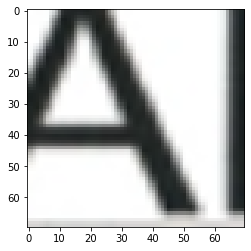

In [256]:
import matplotlib.pyplot as plt
plt.imshow(xtest[1].reshape(70,70,3)) 
plt.show()

In [273]:
dmodel.predict(xtest[1].reshape(1,-1))
from joblib import dump, load
dump(dmodel, 'filename.joblib')
model = load('filename.joblib')
model.predict(xtest[1].reshape(1,-1))

array([1])

In [258]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

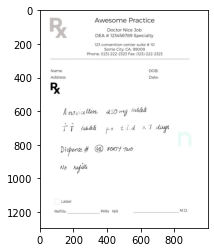

In [274]:
img=cv2.imread("drbeen-sample-prescription-copy-2.webp")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
h,w,c=img.shape
if w>1000:
    new_w=1000
    ar=w/h
    new_h=int(new_w/ar)
    img=cv2.resize(img,(new_w,new_h),interpolation=cv2.INTER_AREA)
plt.imshow(img);

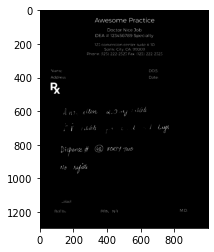

In [275]:
def thresholding(image):
    img_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,thresh=cv2.threshold(img_gray,80,255,cv2.THRESH_BINARY_INV)
    
    plt.imshow(thresh,cmap='gray')
    return thresh
thresh_img=thresholding(img)

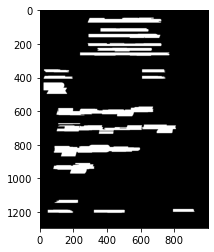

In [276]:
#To detect individual lines for segmentating the word
kernel=np.ones((3,85),np.uint8)
dilated=cv2.dilate(thresh_img,kernel,iterations=1)
plt.imshow(dilated,cmap='gray')

In [277]:
(contours,heiarchy)=cv2.findContours(dilated.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
sorted_contours_lines=sorted(contours, key=lambda ctr:cv2.boundingRect(ctr)[1]) #(1=SOrting Vertically,0=Sorting Horizontally)


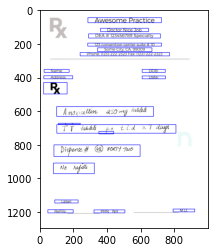

In [278]:
img2=img.copy()
for ctr in sorted_contours_lines:
    x,y,w,h=cv2.boundingRect(ctr)
    cv2.rectangle(img2,(x,y),(x+w,y+h),(0,0,255),2)
plt.imshow(img2)

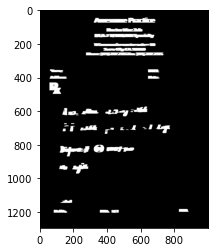

In [279]:
kernel=np.ones((3,15),np.uint8)
dilated=cv2.dilate(thresh_img,kernel,iterations=1)
plt.imshow(dilated,cmap='gray')

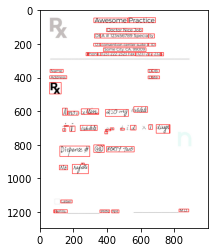

In [280]:
img3=img.copy()
word_list=[]
for line in sorted_contours_lines:
    x,y,w,h=cv2.boundingRect(line)
    #Finding ROI of each line
    roi_line=dilated[y:y+w,x:x+w]
    #Drawing Contours on each word
    (cnt,heiarchy)=cv2.findContours(roi_line.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    sorted_contours_lines=sorted(cnt, key=lambda cntr:cv2.boundingRect(cntr)[0])
    
    for word in sorted_contours_lines:
        if cv2.contourArea(word)<100:
            continue
        x2,y2,w2,h2=cv2.boundingRect(word)
        word_list.append([x+x2,y+y2,x+x2+w2,y+y2+h2])
        cv2.rectangle(img3,(x+x2,y+y2),(x+x2+w2,y+y2+h2),(255,0,0),2)

plt.imshow(img3)

<ipython-input-289-418b55651651>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


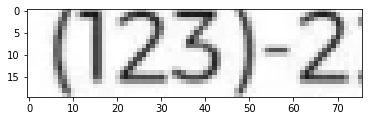

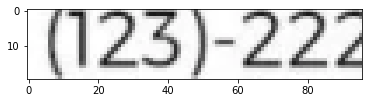

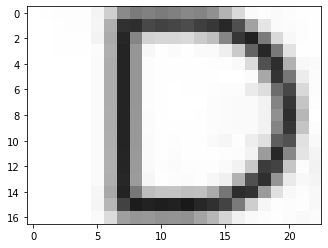

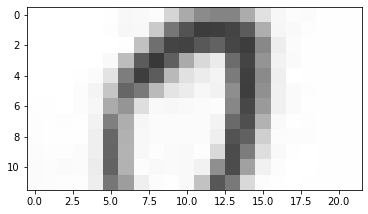

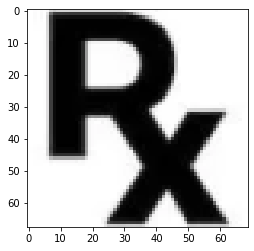

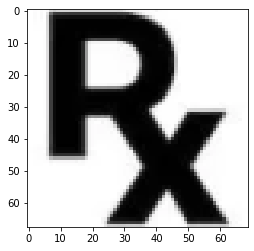

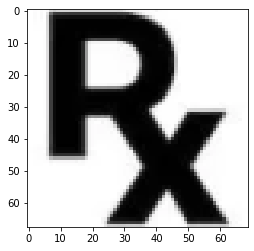

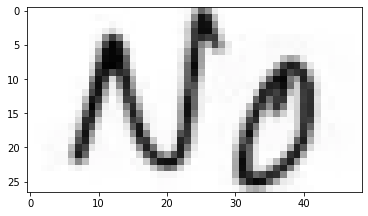

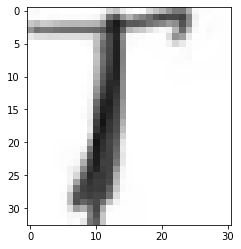

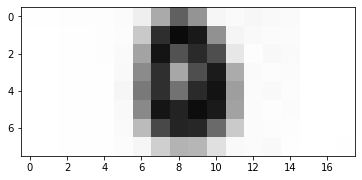

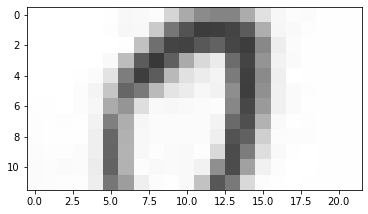

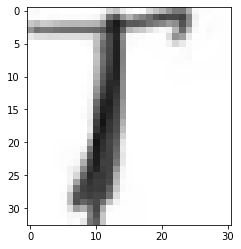

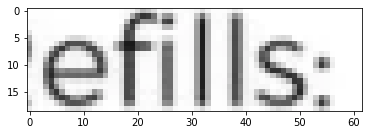

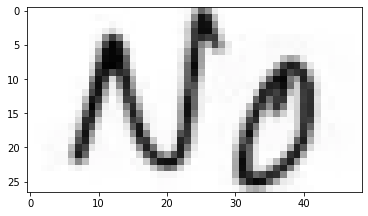

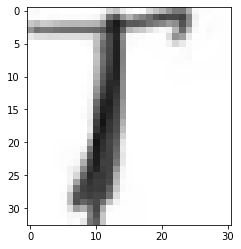

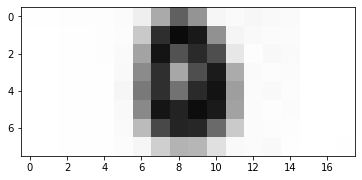

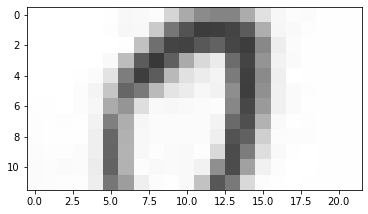

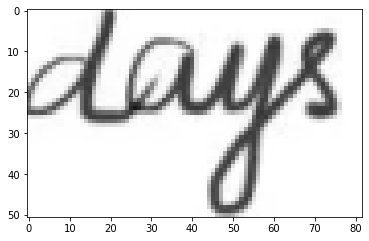

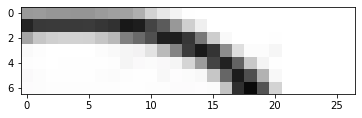

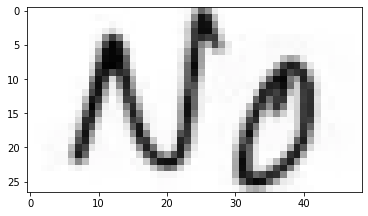

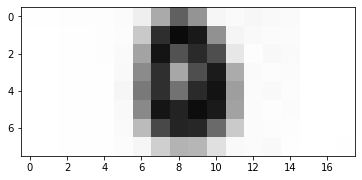

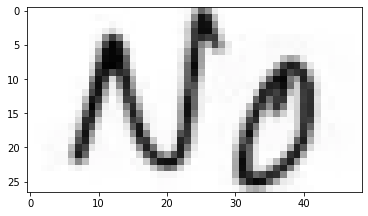

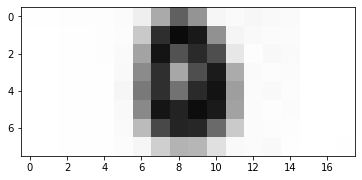

<Figure size 432x288 with 0 Axes>

In [289]:
classes=[0,1]
for word in word_list:
    img1=img[word[1]:word[3],word[0]:word[2]]
    h,w,c=img1.shape
    if w>100:
        continue
    #img_arr=img1[0:5,0:5]
    img_arr=cv2.resize(img1,(70,70))
    nx, ny, nrgb = img_arr.shape
    img_arr2 = img_arr.reshape(1,(nx*ny*nrgb))
    ans=dmodel.predict(img_arr2)
    if(not(classes[ans[0]])):
        continue
    plt.imshow(img1)
    plt.figure()